# Проект "Исследование нены Airbnb в европейских городах"
Выполнили:

Гальцов Илья Сергеевич, M02-201

Троегубов Александр Юрьевич, M01-201

## Введение


Выбранный набор данных дает всесторонний обзор цен Airbnb в самых популярных европейских городах. Каждое объявление оценивается по различным атрибутам, чтобы получить более полное представление о ценах Airbnb как в будние, так и в выходные дни.

С одной стороны, наличие большого количества атрибутов позволяет исчерпывающе описать каждое объявление. Но с другой стороны, это осложняет анализ цен на жилье как для арендодателя, так и для арендатора. В частности, в данных представлено 4 различных индекса (чистота, общая оценка, привлекательность, наличие ресторанов поблизости), которые могут быть скоррелированы.


В данном проекте предлагается проанализировать представленные атрибуты и выделить те из них, которые сильнее всего влияют на цену жилья. В частности, в исследовании выделяются топ 5 некоррелированных атрибутов, влиящих на цену жилья, для каждого имеющегося набора данных.

In [85]:
import os
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.preprocessing import MinMaxScaler

In [80]:
from google.colab import drive
drive.mount('/content/drive')
directory = '/content/drive/My Drive/Colab Notebooks/data/'
print('\n'.join(sorted(os.listdir(directory))))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
amsterdam_weekdays.csv
amsterdam_weekends.csv
athens_weekdays.csv
athens_weekends.csv
barcelona_weekdays.csv
barcelona_weekends.csv
berlin_weekdays.csv
berlin_weekends.csv
budapest_weekdays.csv
budapest_weekends.csv
lisbon_weekdays.csv
lisbon_weekends.csv
london_weekdays.csv
london_weekends.csv
paris_weekdays.csv
paris_weekends.csv
rome_weekdays.csv
rome_weekends.csv
vienna_weekdays.csv
vienna_weekends.csv


Датасет: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

## Первичный анализ данных на примере Амстердама

In [81]:
df = pd.read_csv(directory + "amsterdam_weekdays.csv")

In [82]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [83]:
df.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1103.000000,1103.000000,1103.000000,1103.00000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,551.000000,545.020526,2.792384,0.30825,0.115141,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,14.350154,341.541187,23.799081,4.891158,52.364858
std,318.552978,416.974314,1.044151,0.46198,0.319336,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,10.433764,236.611077,16.487400,0.038882,0.019467
min,0.000000,128.887118,2.000000,0.00000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205,4.775500,52.291100
25%,275.500000,309.797764,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,6.772912,163.469245,11.390772,4.871000,52.354580
50%,551.000000,430.248635,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,11.023286,260.257028,18.135084,4.890010,52.365590
75%,826.500000,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,20.462373,469.290623,32.700846,4.907315,52.375260
max,1102.000000,7782.907225,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000,5.010770,52.423480


- realSum -- суммарная цена в объявлении
- room_type -- [категориальный] -- тип жилья
- room_shared [логический] -- является ли жилье совместным
- room_private [логический] -- является ли жилье личным
- person_capacity -- максимальное число людей в комнате
- host_is_superhost [логический] -- является ли host super-host-ом
- multi -- [логический] -- объявление для нескольких комнат или нет
- biz -- [логический] -- для бизнеса или нет
- cleanliness_rating -- оценка чистоты
- guest_satisfaction_overall -- общая оценка жилья
- bedrooms -- число спален
- dist -- расстояние до центра города
- metro_dist -- расстояние до метро
- attr_index -- индекс привлекательности места расположения жилья
- attr_index_norm
- rest_index -- ресторанный индекс места расположения жилья
- rest_index_norm
- lng -- долгота
- lat -- широта

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

Values counts для переменной {col}:
Private room       0.506800
Entire home/apt    0.487761
Shared room        0.005440
Name: room_type, dtype: float64



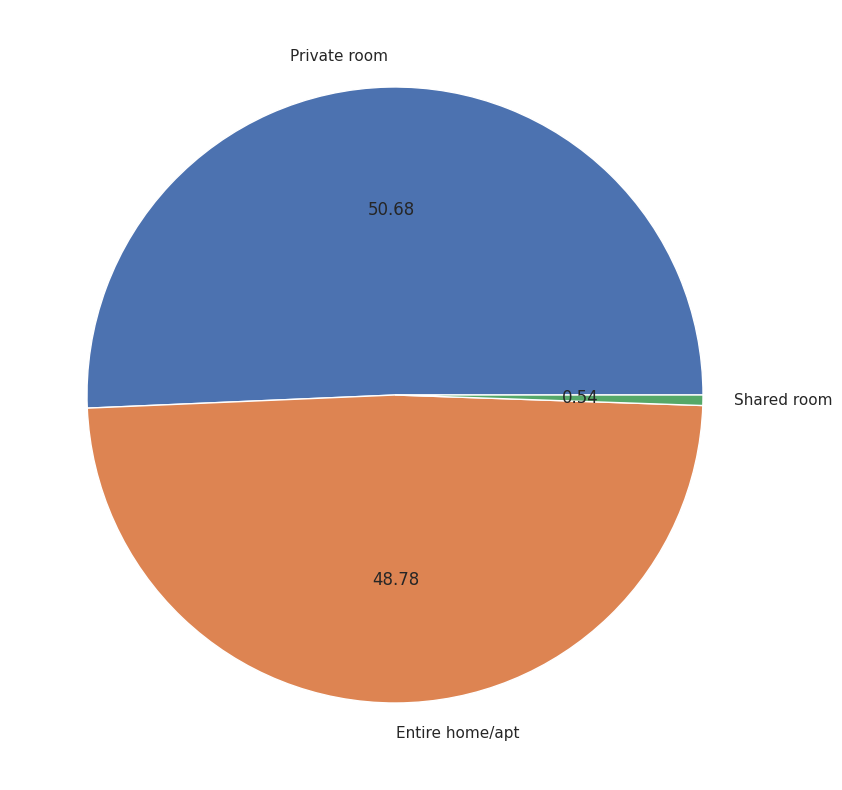

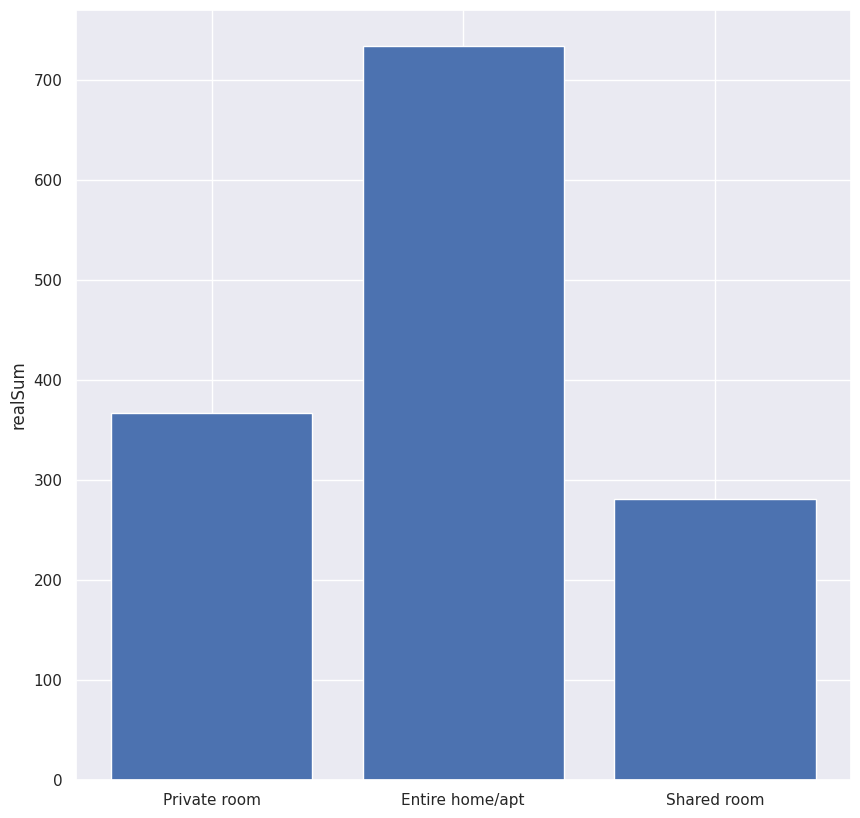

In [96]:
cat_vars = df.select_dtypes(include=['object'])
for col in cat_vars.columns:
    print("Values counts для переменной {col}:")
    print(df[col].value_counts(normalize=True))
    print()

# pie chart для отображения цены комнаты в зависимости от ее типа
df_1 = df[df["room_type"] == "Private room"]
df_2 = df[df["room_type"] == "Entire home/apt"]
df_3 = df[df["room_type"] == "Shared room"]
values = [df_1["room_type"].count(), df_2["room_type"].count(), df_3["room_type"].count()]
plt.pie(values, labels=df["room_type"].unique(), autopct="%.2f")
plt.show()

real_sums = [df_1["realSum"].mean(), df_2["realSum"].mean(), df_3["realSum"].mean()]
plt.bar(df["room_type"].unique(), real_sums)
plt.ylabel('realSum')
plt.show()

In [87]:
num_vars = ["realSum", "cleanliness_rating", "guest_satisfaction_overall", "dist", "metro_dist", "attr_index"]

for var in num_vars:
    z_scores = np.abs(st.zscore(df[var]))
    threshold = 3
    outliers = np.where(z_scores > threshold)[0]
    print(f"Параметр {var}: {len(outliers)} выбросов зафиксировано")

Параметр realSum: 15 выбросов зафиксировано
Параметр cleanliness_rating: 23 выбросов зафиксировано
Параметр guest_satisfaction_overall: 12 выбросов зафиксировано
Параметр dist: 23 выбросов зафиксировано
Параметр metro_dist: 23 выбросов зафиксировано
Параметр attr_index: 9 выбросов зафиксировано


In [89]:
df_1 = df[df["realSum"] > df["realSum"].quantile(0.77)]
df_2 = df[df["realSum"] < df["realSum"].quantile(0.33)]
df_3 = df.loc[(df["realSum"] <= df["realSum"].quantile(0.77)) \
             & (df["realSum"] >= df["realSum"].quantile(0.33))]

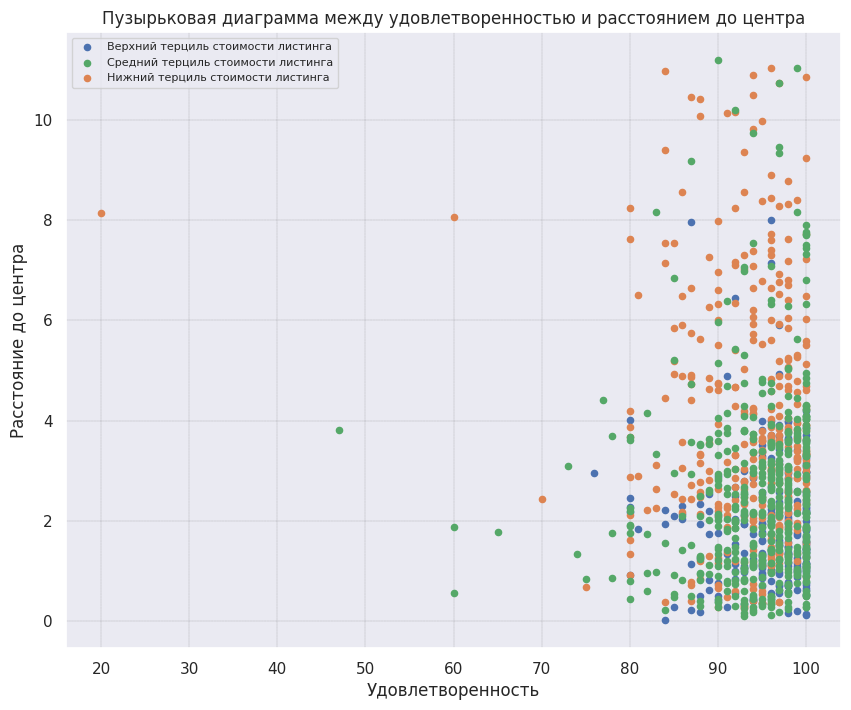

In [90]:
# Соотношение между удовлетворенностью и расстоянием до центра
fig, ax = plt.subplots(figsize=(10, 8))
p1 = plt.scatter(df_1["guest_satisfaction_overall"],
            df_1["dist"], s=20)
p2 = plt.scatter(df_2["guest_satisfaction_overall"],
            df_2["dist"], s=20)
p3 = plt.scatter(df_3["guest_satisfaction_overall"],
            df_3["dist"], s=20)
p4 = plt.scatter(df_4["guest_satisfaction_overall"],
            df_4["dist"], s=20, c = 'red', )
plt.xlabel("Удовлетворенность")
plt.ylabel("Расстояние до центра")
plt.title("Пузырьковая диаграмма между удовлетворенностью и расстоянием до центра")

plt.grid(c = 'black', linestyle = '--', linewidth = 0.1)

plt.legend((p1, p3, p2),
           ('Верхний терциль стоимости листинга',
            'Средний терциль стоимости листинга',
            'Нижний терциль стоимости листинга'),
           scatterpoints=1, loc='upper left', ncol=1, fontsize=8)
plt.show()

Из графика выше отчесливо видно, что наибольшая удовлетворенность наблюдается при наименьшей удаленности от центра, причем нижняя треть листингов, выделенная по стоимости жилья, соответствует большей удаленности от центра, чем средний и верхний терцили.

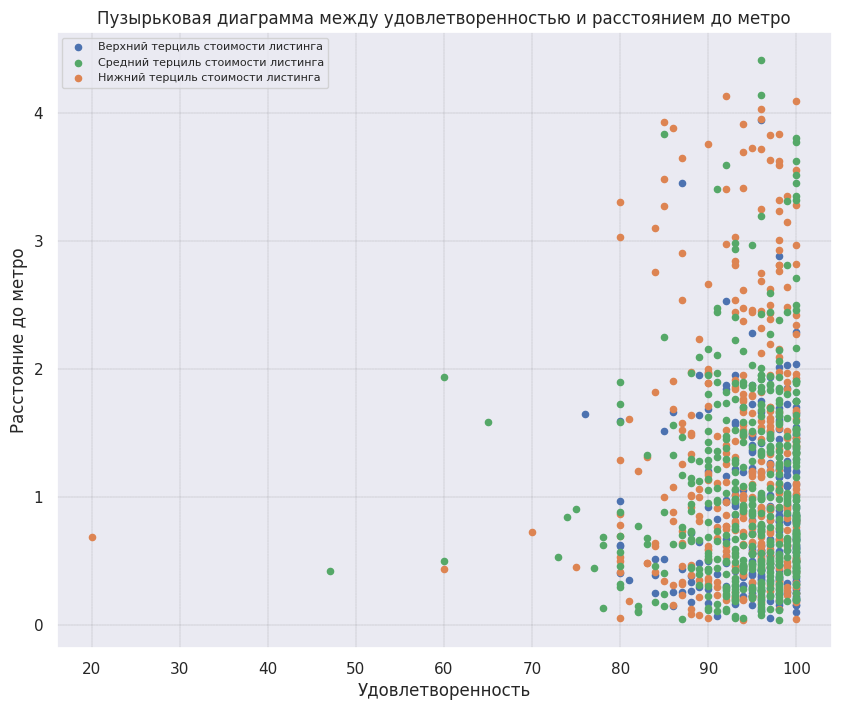

In [91]:
# Соотношение между удовлетворенностью и расстоянием до метро
fig, ax = plt.subplots(figsize=(10, 8))
p1 = plt.scatter(df_1["guest_satisfaction_overall"],
            df_1["metro_dist"], s=20)
p2 = plt.scatter(df_2["guest_satisfaction_overall"],
            df_2["metro_dist"], s=20)
p3 = plt.scatter(df_3["guest_satisfaction_overall"],
            df_3["metro_dist"], s=20)
plt.xlabel("Удовлетворенность")
plt.ylabel("Расстояние до метро")
plt.title("Пузырьковая диаграмма между удовлетворенностью и расстоянием до метро")

plt.grid(c = 'black', linestyle = '--', linewidth = 0.1)

plt.legend((p1, p3, p2),
           ('Верхний терциль стоимости листинга',
            'Средний терциль стоимости листинга',
            'Нижний терциль стоимости листинга'),
           scatterpoints=1, loc='upper left', ncol=1, fontsize=8)
plt.show()

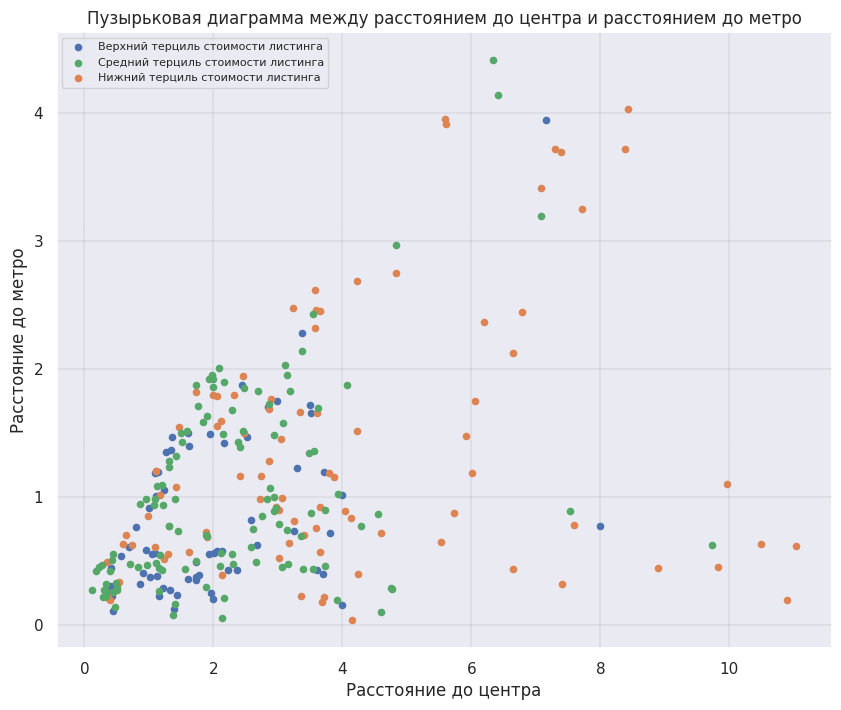

In [92]:
lower_satisfac = 94
upper_satisfac = 96

df_1_high_satis = df_1.loc[(df_1["guest_satisfaction_overall"] <= upper_satisfac) \
             & (df_1["guest_satisfaction_overall"] >= lower_satisfac)]
df_2_high_satis = df_2.loc[(df_2["guest_satisfaction_overall"] <= upper_satisfac) \
             & (df_2["guest_satisfaction_overall"] >= lower_satisfac)]
df_3_high_satis = df_3.loc[(df_3["guest_satisfaction_overall"] <= upper_satisfac) \
             & (df_3["guest_satisfaction_overall"] >= lower_satisfac)]

fig, ax = plt.subplots(figsize=(10, 8))
p1 = plt.scatter(df_1_high_satis["dist"],
            df_1_high_satis["metro_dist"], s=20)
p2 = plt.scatter(df_2_high_satis["dist"],
            df_2_high_satis["metro_dist"], s=20)
p3 = plt.scatter(df_3_high_satis["dist"],
            df_3_high_satis["metro_dist"], s=20)

plt.xlabel("Расстояние до центра")
plt.ylabel("Расстояние до метро")
plt.title("Пузырьковая диаграмма между расстоянием до центра и расстоянием до метро")

plt.grid(c = 'black', linestyle = '--', linewidth = 0.1)

plt.legend((p1, p3, p2),
           ('Верхний терциль стоимости листинга',
            'Средний терциль стоимости листинга',
            'Нижний терциль стоимости листинга'),
           scatterpoints=1, loc='upper left', ncol=1, fontsize=8)
plt.show()

9.330708661417322 9.478483606557377


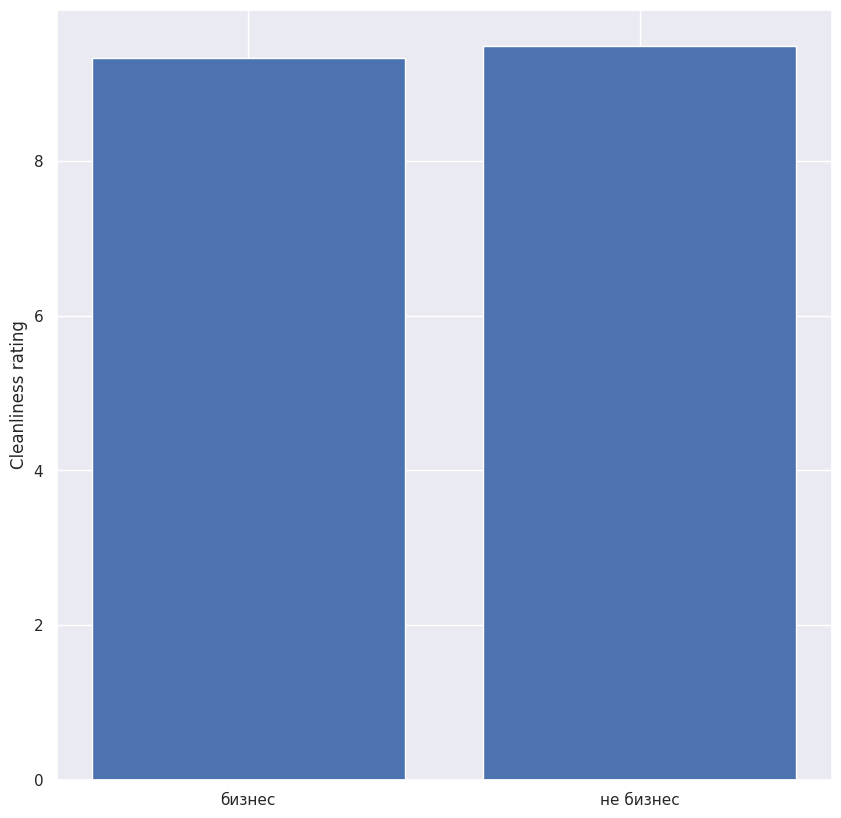

In [98]:
# Связь параметра "biz" и средней величины чистоты комнаты
biz_value = df[df["biz"] == 1]["cleanliness_rating"].mean()
not_biz_value = df[df["biz"] == 0]["cleanliness_rating"].mean()
values = [biz_value, not_biz_value]
plt.bar(["бизнес", "не бизнес"], values)
plt.ylabel('Cleanliness rating')
print(biz_value, not_biz_value)

514.0464816584496 549.0509605451753


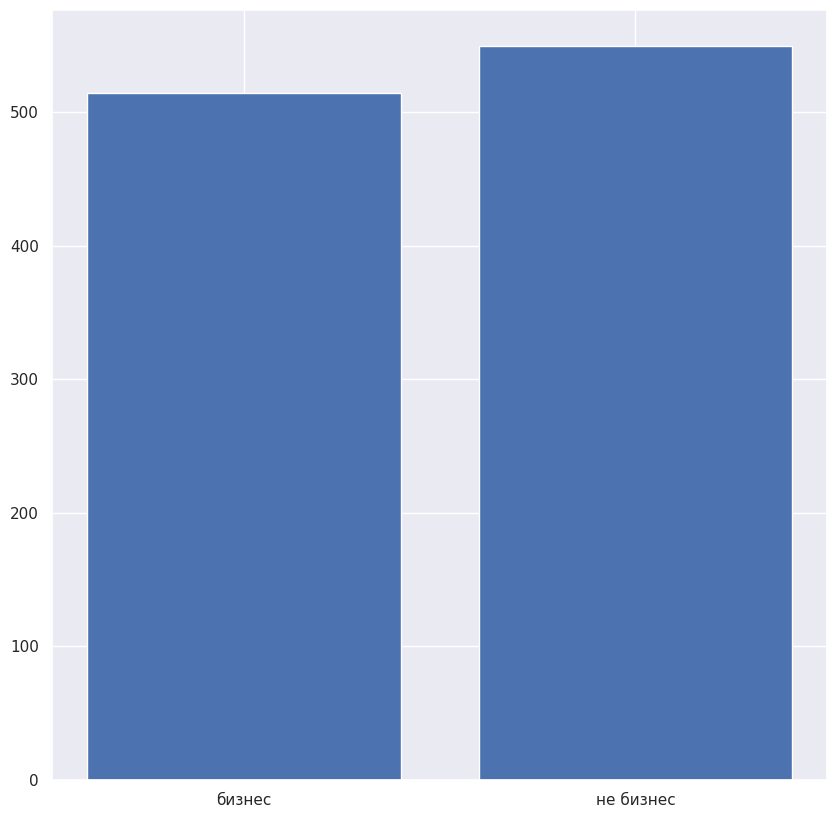

In [94]:
# Связь параметра "biz" и средней стоимости листинга
biz_value = df[df["biz"] == 1]["realSum"].mean()
not_biz_value = df[df["biz"] == 0]["realSum"].mean()
values = [biz_value, not_biz_value]
plt.bar(["бизнес", "не бизнес"], values)
plt.ylabel('realSum')
print(biz_value, not_biz_value)

realSum:
p-value: 5.432354341593131e-37 меньше 0.05 => распределение не является нормальным
Удовлетвоенность:
p-value: 2.829857004247469e-37 меньше 0.05 => распределение не является нормальным
attr_index:
p-value: 2.1915352439442334e-31 меньше 0.05 => распределение не является нормальным
rest_index:
p-value: 8.758483044983812e-27 меньше 0.05 => распределение не является нормальным


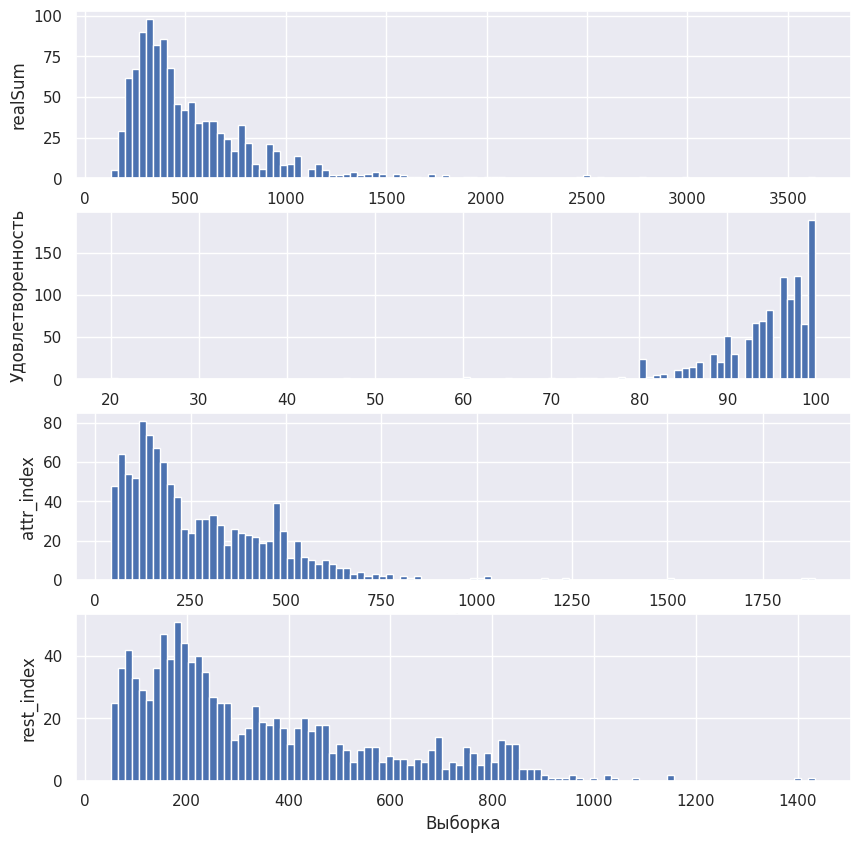

In [95]:
# Проверим распределения некоторых величин на нормальность

# realSum
realSum_wo_big = df[df["realSum"] <= 4000]
plt.subplot(4, 1, 1)
plt.hist(realSum_wo_big["realSum"], bins=100)
plt.xlabel("Выборка")
plt.ylabel("realSum")
stats, p = st.shapiro(realSum_wo_big["realSum"])
print("realSum:")
if (p < 0.05):
    print("p-value:", p, "меньше 0.05 => распределение не является нормальным")
else:
    print("p-value:", p, "больше 0.05 => распределение близко к нормальному")

# guest_satisfaction
plt.subplot(4, 1, 2)
plt.hist(realSum_wo_big["guest_satisfaction_overall"], bins=100)
plt.xlabel("Выборка")
plt.ylabel("Удовлетворенность")
stats, p = st.shapiro(realSum_wo_big["guest_satisfaction_overall"])
print("Удовлетвоенность:")
if (p < 0.05):
    print("p-value:", p, "меньше 0.05 => распределение не является нормальным")
else:
    print("p-value:", p, "больше 0.05 => распределение близко к нормальному")

# attr_index
plt.subplot(4, 1, 3)
plt.hist(realSum_wo_big["attr_index"], bins=100)
plt.xlabel("Выборка")
plt.ylabel("attr_index")
stats, p = st.shapiro(realSum_wo_big["attr_index"])
print("attr_index:")
if (p < 0.05):
    print("p-value:", p, "меньше 0.05 => распределение не является нормальным")
else:
    print("p-value:", p, "больше 0.05 => распределение близко к нормальному")

# rest_index
plt.subplot(4, 1, 4)
plt.hist(realSum_wo_big["rest_index"], bins=100)
plt.xlabel("Выборка")
plt.ylabel("rest_index")
stats, p = st.shapiro(realSum_wo_big["rest_index"])
print("rest_index:")
if (p < 0.05):
    print("p-value:", p, "меньше 0.05 => распределение не является нормальным")
else:
    print("p-value:", p, "больше 0.05 => распределение близко к нормальному")

plt.show()

## Выделение наиболее важных факторов, влияющих на цену жилья в разных городах

In [69]:
# посчитаем число значений для некоторых логических переменных
file = 'amsterdam_weekdays.csv'
df = pd.read_csv(directory + file)

print(df.room_type.unique())
print(df.room_shared.value_counts())
print(df.room_type.value_counts())
print(df.multi.value_counts())
print(df.biz.value_counts())


['Private room' 'Entire home/apt' 'Shared room']
False    1097
True        6
Name: room_shared, dtype: int64
Private room       559
Entire home/apt    538
Shared room          6
Name: room_type, dtype: int64
0    763
1    340
Name: multi, dtype: int64
0    976
1    127
Name: biz, dtype: int64


Посмотрим подробнее на все имеющиеся признаки.

- realSum -- суммарная цена в объявлении
- room_type -- [категориальный] -- тип жилья
- room_shared [логический] -- является ли жилье совместным
- room_private [логический] -- является ли жилье личным
- person_capacity -- максимальное число людей в комнате
- host_is_superhost [логический] -- является ли host super-host-ом
- multi -- [логический] -- объявление для нескольких комнат или нет
- biz -- [логический] -- для бизнеса или нет
- cleanliness_rating -- оценка чистоты
- guest_satisfaction_overall -- общая оценка жилья
- bedrooms -- число спален
- dist -- расстояние до центра города
- metro_dist -- расстояние до метро
- **attr_index** -- индекс привлекательности места расположения жилья
- attr_index_norm
- **rest_index** -- ресторанный индекс места расположения жилья
- rest_index_norm
- **lng** -- долгота
- **lat** -- широта

Уберем признаки lng, lat, attr_index, rest_index как несодержательные. Категориальный признак room_type переведем в логический: room_shared, room_private, entire_home.
Потом все логические приведем к int для удобства работы. Объявлений с shared room очень мало, уберем такие строки.

<Axes: >

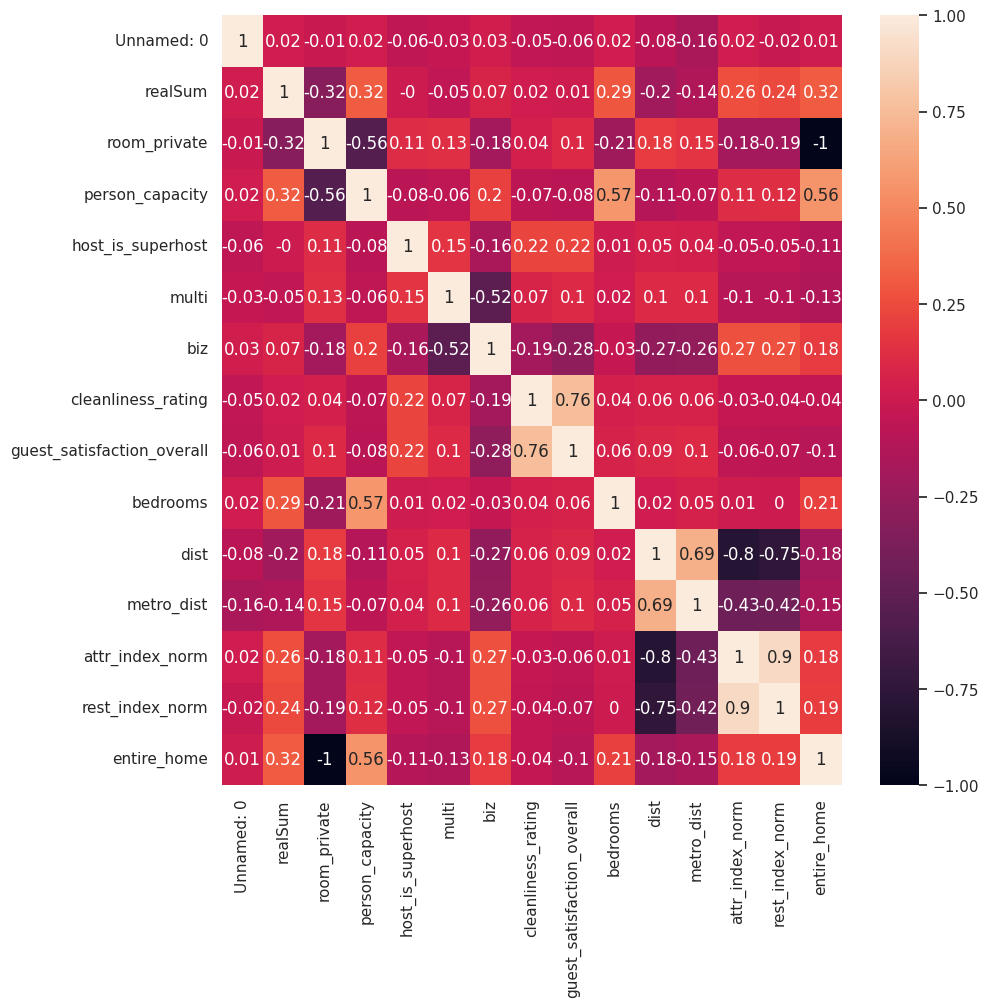

In [70]:
# пример обработки датасета для одного из городов
file = 'amsterdam_weekdays.csv'
df = pd.read_csv(directory + file)

df['entire_home'] = pd.Series(False, df.index)
df.loc[df.room_type == 'Entire home/apt', 'entire_home'] = True
df = df.drop(df[df.room_type == 'Shared room'].index)
df.drop(columns=['lng', 'lat', 'attr_index', 'rest_index', 'room_type', 'room_shared'], inplace=True)

correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1, vmax=1, )

In [71]:
# выбор набора признаков сделаем через линейную регрессию + AIC (Akaike Information Criterion)
def aic(X, y, sigma2):
    """ Calculate AIC based on X (features), y (answers), sigma2 (variance)"""

    beta_estim = inv(X.T @ X) @ X.T @ y
    #residual sum of squares
    rss = np.sum((X @ beta_estim - y)**2)
    N = len(y)
    # log-likelihood
    l = -N/2 * np.log(2*np.pi) - N/2 * np.log(sigma2) - 1/(2*sigma2) * rss
    # number of features
    S = X.shape[1]
    aic = l - S

    return aic

def forward_stepwise_regression(X, y, sigma2):
    # all existing features
    all_features = np.arange(X.shape[1])
    # score on previous step
    prev_score = -np.infty
    # selected features
    selected_features = []
    # [added_feature, score]
    score_progress = []

    while len(selected_features) < len(all_features):

        features_to_add = [f for f in all_features if f not in selected_features]
        score_data = np.zeros((len(features_to_add), 2))

        for (i, feature) in enumerate(features_to_add):
            new_features = selected_features + [feature]
            score = aic(X[:, np.array(new_features, dtype=int)], y, sigma2)
            score_data[i] = np.array([feature, score])

        if np.max(score_data[:, 1]) < prev_score:
            # can't improve score by adding new feature
            break

        # best feature
        idx = np.argmax(score_data[:, 1])
        score_progress.append(list(score_data[idx]))
        prev_score = score_data[idx, 1]
        selected_features.append(score_data[idx, 0])

    score_progress = np.array(score_progress)
    return score_progress

all_features = [
    'realSum', 'room_private', 'person_capacity', 'host_is_superhost',
    'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
    'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm',
    'entire_home']

bool_features = ['entire_home', 'room_private', 'host_is_superhost', 'biz', 'multi']

def get_and_preprocess_dataframe(filename):
    df = pd.read_csv(filename, index_col=False)
    df.drop('Unnamed: 0', inplace=True, axis=1)
    df.index.name = 'index'

    # replace categorial feature with bool feature
    df['entire_home'] = pd.Series(False, df.index)
    df.loc[df.room_type == 'Entire home/apt', 'entire_home'] = True

    # remove shared rooms
    df = df.drop(df[df.room_type == 'Shared room'].index)

    # convert bools to ints
    for f in bool_features:
      df[f] = df[f].astype(int)

    # drop useless columns
    df.drop(columns=['lng', 'lat', 'attr_index', 'rest_index', 'room_type', 'room_shared'], inplace=True, axis=1)
    return df

def select_top_5_features(filename):

    Y_feature = 'realSum'
    X_features = [f for f in all_features if f != Y_feature]

    df = get_and_preprocess_dataframe(filename)
    X = df[X_features].to_numpy()
    Y = df[Y_feature].to_numpy()

    scaler = MinMaxScaler((0, 1))
    X = scaler.fit_transform(X)

    beta_estim = inv(X.T @ X) @ X.T @ Y
    rsd_error = X @ beta_estim - Y
    var = np.var(rsd_error, ddof=X.shape[1])

    score_progress = forward_stepwise_regression(X, Y, var)

    selected_features = [X_features[int(i)] for (i, score) in score_progress]
    return selected_features[:5]

In [73]:
best_features = []

for file in sorted(os.listdir(directory)):
    selected_features = select_top_5_features(directory + file)
    print(f"{file}: {selected_features}")
    best_features.extend(selected_features)



amsterdam_weekdays.csv: ['bedrooms', 'attr_index_norm', 'entire_home', 'person_capacity', 'cleanliness_rating']
amsterdam_weekends.csv: ['bedrooms', 'rest_index_norm', 'person_capacity', 'entire_home', 'guest_satisfaction_overall']
athens_weekdays.csv: ['cleanliness_rating', 'rest_index_norm', 'bedrooms', 'biz', 'host_is_superhost']
athens_weekends.csv: ['cleanliness_rating', 'attr_index_norm', 'person_capacity', 'biz', 'rest_index_norm']
barcelona_weekdays.csv: ['bedrooms', 'entire_home', 'guest_satisfaction_overall', 'biz']
barcelona_weekends.csv: ['bedrooms', 'entire_home', 'biz', 'person_capacity']
berlin_weekdays.csv: ['bedrooms', 'entire_home', 'attr_index_norm', 'person_capacity', 'cleanliness_rating']
berlin_weekends.csv: ['bedrooms', 'entire_home', 'attr_index_norm', 'person_capacity', 'cleanliness_rating']
budapest_weekdays.csv: ['guest_satisfaction_overall', 'person_capacity', 'entire_home', 'bedrooms', 'attr_index_norm']
budapest_weekends.csv: ['cleanliness_rating', 'person

In [76]:
uniq_best_features = set(best_features)
for uf in uniq_best_features:
    print(f'{uf}: {best_features.count(uf)}/{len(os.listdir(directory))}')

host_is_superhost: 1/20
entire_home: 13/20
attr_index_norm: 14/20
rest_index_norm: 6/20
bedrooms: 19/20
person_capacity: 18/20
cleanliness_rating: 9/20
guest_satisfaction_overall: 8/20
biz: 5/20
room_private: 3/20
dist: 1/20
metro_dist: 1/20


In [102]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/python_project.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/python_project.ipynb to html
[NbConvertApp] Writing 1480760 bytes to /content/drive/MyDrive/Colab Notebooks/python_project.html
